<a href="https://colab.research.google.com/github/sambhuyadav/Machine-Learning-Resources/blob/main/SST_2028_A_OneSampTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing required libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from statsmodels.stats.proportion import proportions_ztest



#----------------------------------------   Part 1: "One Sample Z_Test"  --------------------------------------------

In [ ]:
"""
Scores on the GMAT are roughly normally distributed
with a mu=527 and sigma=112.
If alpha is 5%, and you randomly survey 36 alumni
of By-two's, how much should their mean GMAT score be AT MINIMUM,
for you to take the company's claim seriously?
"""



#----------------------------------------   Part 2: "One Sample T_Test"  --------------------------------------------

#Penguin dataset from Seaborn


> Testing if sample weights of "Gentoo Penguins" are consistent with population parameter available on the Internet


In [ ]:
#Loading penguins dataset (from seaborn) into a dataframe

penguins = sns.load_dataset("penguins")

penguins


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [ ]:
penguins["species"].value_counts()

,count
species,
Adelie,152
Gentoo,124
Chinstrap,68


<Axes: xlabel='body_mass_g', ylabel='Density'>

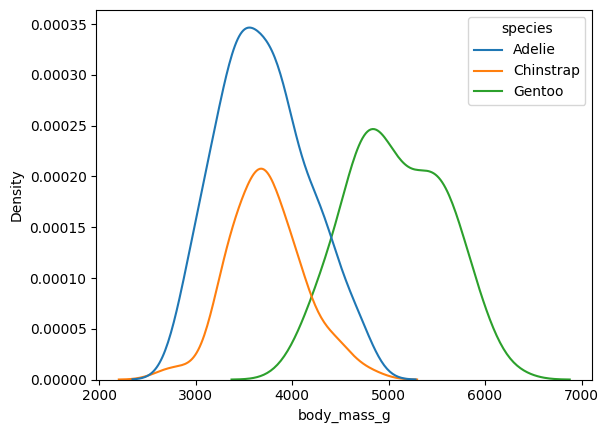

In [ ]:
sns.kdeplot(data=penguins, x='body_mass_g', hue='species')

In [ ]:
#Taking a sample of data for "Gentoo Penguins only"

n = 7

gentoo_penguins_sample = penguins[penguins['species'] == "Gentoo"].dropna().sample(n)

gentoo_penguins_sample

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
256,Gentoo,Biscoe,42.6,13.7,213.0,4950.0,Female
282,Gentoo,Biscoe,45.7,13.9,214.0,4400.0,Female
280,Gentoo,Biscoe,45.3,13.8,208.0,4200.0,Female
343,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,Male
270,Gentoo,Biscoe,46.6,14.2,210.0,4850.0,Female
267,Gentoo,Biscoe,50.5,15.9,225.0,5400.0,Male
307,Gentoo,Biscoe,51.3,14.2,218.0,5300.0,Male


In [ ]:
sample_wt = gentoo_penguins_sample["body_mass_g"]

print(sample_wt.mean())
print(sample_wt.std())

4928.571428571428
482.9226498252963


In [ ]:
sample_wt

,body_mass_g
256,4950.0
282,4400.0
280,4200.0
343,5400.0
270,4850.0
267,5400.0
307,5300.0


Hypothesis Testing:


> According to the Internet, the population mean weight of Gentoo penguins is = 5000 g



In [ ]:
#Ho: mu = 5000
#Ha: mu != 5000 (two-tailed)

mu = 5000

n = 7
m = sample_wt.mean()
s = sample_wt.std()
SE = s / np.sqrt(n)

# x = mu + t * SE
t_score = (m - mu) / SE

stats.t.cdf(t_score, df=n-1)

#additional argument called df, where df = n-1

np.float64(0.3545362592322412)

In [ ]:
#Shorcut function for a 1 sample ttest,
#if you have a list of values

x = sample_wt

#this function takes 3 arguments
#first argument: list / array (sample)
#second argument: popmean = 5000
#third argument: alternative = "less" / "greater" / "two-sided"
stats.ttest_1samp(x , popmean=5000, alternative="two-sided")

TtestResult(statistic=np.float64(-0.39133024009741685), pvalue=np.float64(0.7090725184644824), df=np.int64(6))

##If the sample is available as a list of values

In [ ]:
sample_of_penguin_weights = gentoo_penguins_sample['body_mass_g']

print(sample_of_penguin_weights) #List-like: list / array / series

In [ ]:
#There is a function that allows you to do 1 samp ttest very quickly

#Ho: mu = 5000
#Ha: mu != 5000 ('two-sided')

#ttest_1samp


stats.ttest_1samp(a= sample_of_penguin_weights, popmean= 5000, alternative='two-sided')

#----------------------------------   Part 3: "Z proportion Test"  -----------------------------------------------------

#Cars in Poland data: Proporition of European Brand cars in Population

In [ ]:
#importing the Car_Prices_Poland dataset

!gdown 1TWXu3VB09tf9_kzdDORedjY1N0dMjp8U

Car_Prices_Poland = pd.read_csv("Car_Prices_Poland_Kaggle.csv")

print(f"\n\nSuccess! Data loaded into dataframe Car_Prices_Poland:\n\n {Car_Prices_Poland.head()}")

print(f"\n\nShape of Car_Prices_Poland dataframe = {Car_Prices_Poland.shape}")

Downloading...
From: https://drive.google.com/uc?id=1TWXu3VB09tf9_kzdDORedjY1N0dMjp8U
To: /content/Car_Prices_Poland_Kaggle.csv
100% 9.89M/9.89M [00:00<00:00, 63.4MB/s]


Success! Data loaded into dataframe Car_Prices_Poland:

    Unnamed: 0  mark  model generation_name  year  mileage  vol_engine    fuel  \
0           0  opel  combo      gen-d-2011  2015   139568        1248  Diesel   
1           1  opel  combo      gen-d-2011  2018    31991        1499  Diesel   
2           2  opel  combo      gen-d-2011  2015   278437        1598  Diesel   
3           3  opel  combo      gen-d-2011  2016    47600        1248  Diesel   
4           4  opel  combo      gen-d-2011  2014   103000        1400     CNG   

              city     province  price  
0            Janki  Mazowieckie  35900  
1         Katowice      Śląskie  78501  
2            Brzeg     Opolskie  27000  
3        Korfantów     Opolskie  30800  
4  Tarnowskie Góry      Śląskie  35900  


Shape of Car_Prices_Poland dataframe 

In [ ]:
Car_Prices_Poland['mark'].unique()

In [ ]:
#Adding a Boolean column to mark European Brands

european_brands_list = ['opel', 'audi', 'bmw', 'volkswagen', 'mercedes-benz',
                        'renault', 'skoda', 'alfa-romeo', 'citroen',
                        'fiat', 'mini', 'peugeot', 'seat', 'volvo']

Car_Prices_Poland['European_Brand?'] = Car_Prices_Poland['mark'].isin(european_brands_list)


print(Car_Prices_Poland.head())

In [ ]:
#Display proportion of European Brands in Population

print(f"Total Cars in Population = {Car_Prices_Poland.shape[0] : ,}\n")
print(f"Total European Brand Cars in Population = {Car_Prices_Poland['European_Brand?'].sum() : ,}\n")
print(f"Proportion of European Branded Cars in Population = {Car_Prices_Poland['European_Brand?'].sum() / Car_Prices_Poland.shape[0] : .3f}\n")

##Sampling cars to predict "proportion of European brand cars" population

In [ ]:
#Sample size (n)
n = 25

#Number of random samples to be picked (each of size 'n')
num_of_samples = 8

samples = np.random.choice(Car_Prices_Poland['European_Brand?'], size=(num_of_samples, n))
sample_proportions = samples.sum(axis=1)/n


print(f"Proportion of European Cars in each of the {num_of_samples} samples of sample size = {n}:\n\n")

print(f"{'Sample_index' : ^20} | {'Proportion_Euro_in_Sample' : ^30} | {f'First {min(10,n)}/{n} Boolean values for European_Brand? in sample' : ^65}")
print("-"*120)

for i, sample_i in enumerate(samples):
  print(f"{i : ^20d} | {sample_i.sum()/sample_i.size: ^30.3f} | {np.array(sample_i)[:10]}")
  print("-"*120)


Proportion of European Cars in each of the 8 samples of sample size = 25:


    Sample_index     |   Proportion_Euro_in_Sample    |     First 10/25 Boolean values for European_Brand? in sample     
------------------------------------------------------------------------------------------------------------------------
         0           |             0.640              | [ True  True False False False False  True  True False False]
------------------------------------------------------------------------------------------------------------------------
         1           |             0.680              | [False  True  True False  True False False  True False  True]
------------------------------------------------------------------------------------------------------------------------
         2           |             0.800              | [ True False  True  True  True False  True False  True  True]
-------------------------------------------------------------------------------------

CLT: Plotting Sample_Proportions of many, many such samples

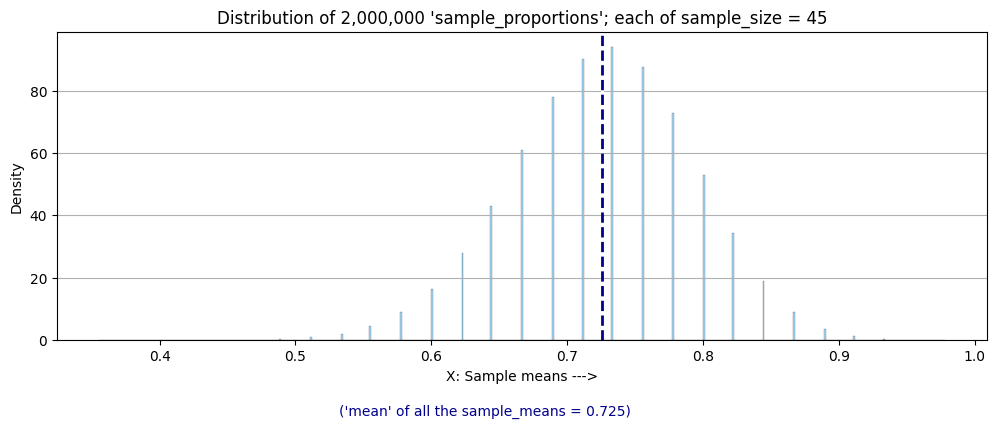

In [ ]:
#Sample size (n)
n = 45

#Number of random samples to be picked (each of size 'n')
num_of_samples = 500000

samples = np.random.choice(Car_Prices_Poland['European_Brand?'], size=(num_of_samples, n))
sample_proportions = samples.sum(axis=1) / n



plt.figure(figsize=(12,4))
plt.title(f"Distribution of {num_of_samples:,} 'sample_proportions'; each of sample_size = {n}")
sns.histplot(x=sample_proportions, stat='density', color="lightskyblue") #stat= 'count' / 'density' / 'kde'
plt.grid(axis='y')
plt.axvline(sample_proportions.mean(), color="darkblue", linewidth=2, linestyle='dashed', gapcolor="white")
plt.xlabel("X: Sample means --->")
plt.figtext(0.36, -0.08,f"('mean' of all the sample_means = {sample_proportions.mean():.3f})", color='darkblue')
plt.show()


##Solving Questions on Z Proportion test

In [ ]:
"""

from statsmodels.stats.proportion import proportions_ztest

proportions_ztest(count = , nobs = , value= , alternative=’two-sided’)

where the inputs to be given are:
    (a) count: The number of successes in sample
    (b) nobs: Total number of observation in sample
    (c) value: The hypothesized population proportion (on a scale of 0 to 1)
    (d) alternative: The alternative hypothesis (‘smaller’, ‘larger’, default =‘two-sided’)


Output of the function:
A tuple containing (z_stat, p_value)

"""

from statsmodels.stats.proportion import proportions_ztest
#proportions_ztest(count = , nobs = , value= , alternative= 'smaller' / 'larger' /'two-sided')

In [ ]:
#Question 1

"""
A fast-food restaurant claims that 80% of their customers prefer their new burger over the old one.
In a random sample of 100 customers, 85 said they preferred the new burger.
What is the null and alternative hypothesis?
"""




In [ ]:
#Question 2

"""
A researcher is studying the satisfaction level of customers
after implementing a new customer service system.

They collected survey responses from 250 customers
and found that 65 of them were dissatisfied with the new system.


The researcher wants to test the null hypothesis that
no more than 30% of customers are dissatisfied with the new system.

Use the p-value technique to test the claim with a significance level of α = 0.05.
"""

